In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train_Test_Split
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error

# Skew
from scipy.stats import skew

# Trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Pickle
import pickle

# Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")
print(df.shape)
df.head()

(1338, 8)


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
for cols in df:
    print("{:15} - {} items" .format(cols.title(), len(df[cols].unique())))

Age             - 47 items
Sex             - 2 items
Bmi             - 548 items
Children        - 6 items
Smoker          - 2 items
Region          - 4 items
Charges         - 1337 items
Insuranceclaim  - 2 items


In [4]:
cat = ["sex", "children", "smoker", "region"]
num = ["age", "bmi", "charges"]

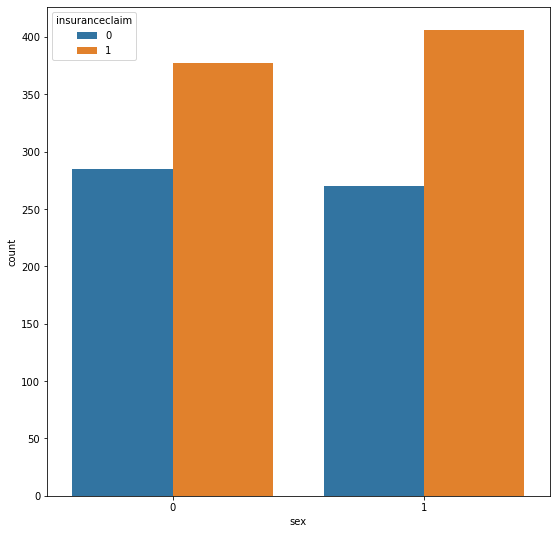

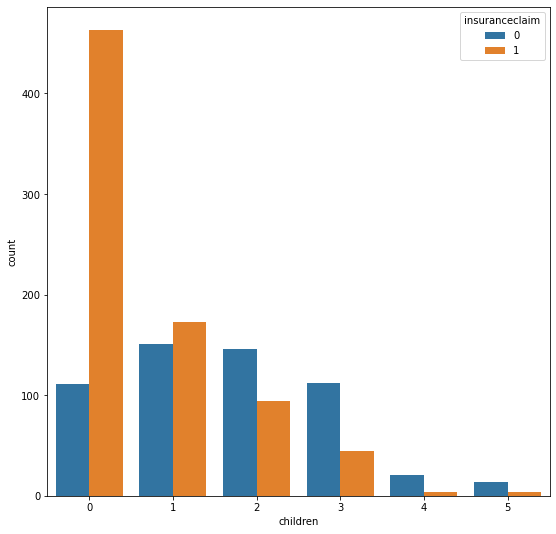

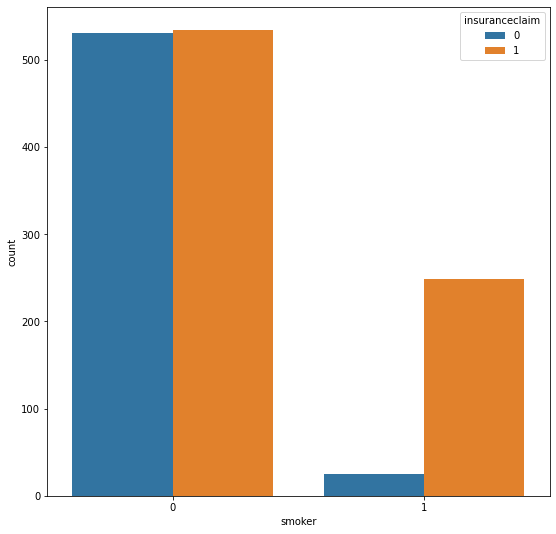

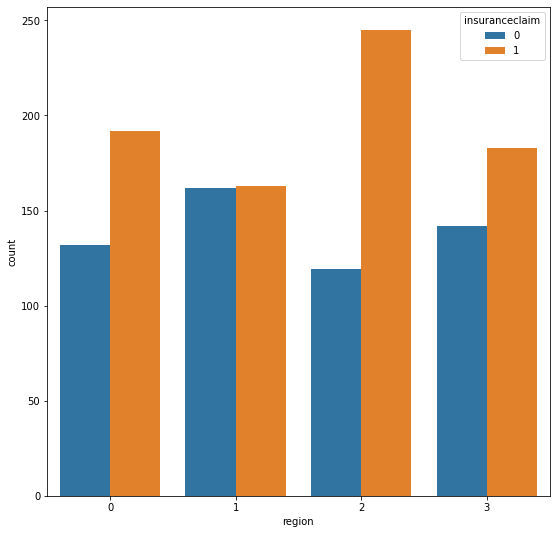

In [10]:
for cols in cat:
    plt.figure(figsize=(9,9))
    sns.countplot(data=df, x=cols, hue="insuranceclaim")
    plt.savefig("Plots/" + cols + ".png")
    plt.show()

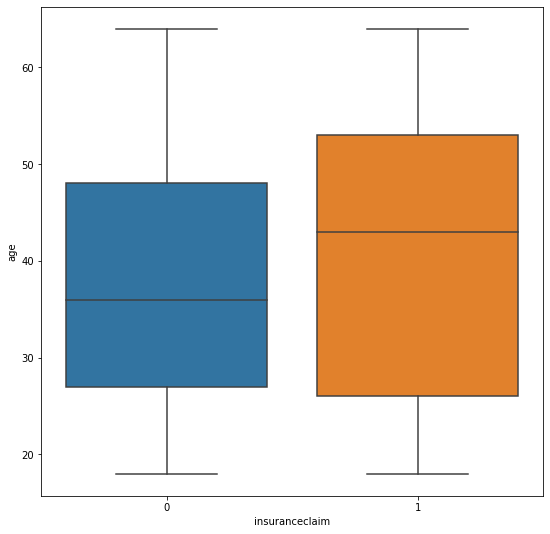

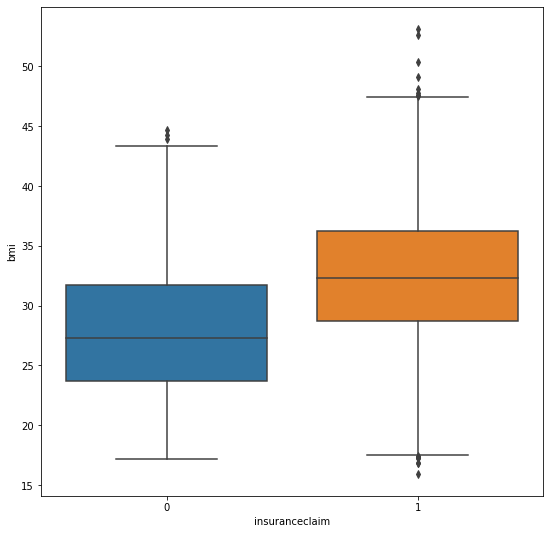

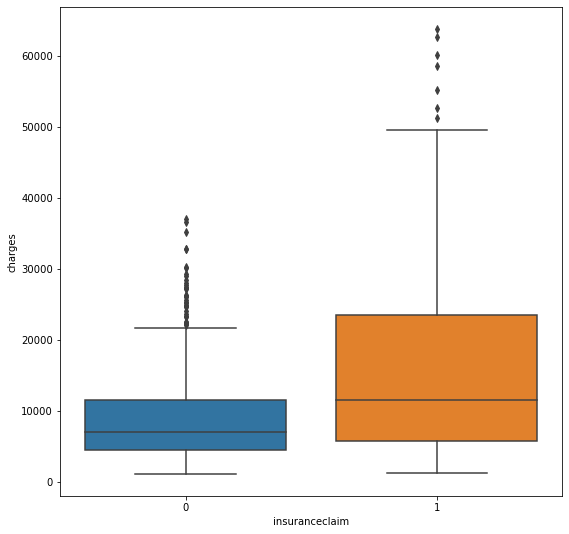

In [11]:
for cols in num:
    plt.figure(figsize=(9,9))
    sns.boxplot(y=df[cols], x=df["insuranceclaim"])
    plt.savefig("Plots/" + cols + ".png")
    plt.show()

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = dtc.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [21]:
file = open("insurance.ser", "wb")
pickle.dump(dtc, file)
file.close()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB
